Scikit learn wine i
- The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [273]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [229]:
wine = load_wine()


In [230]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


'od280/od315_of_diluted_wines' : Sulandırılmış şarap örneğinin 280 nm ve 315 nm dalga boylarında ölçülen optik yoğunluğu (absorbansı) oranı

In [231]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [232]:
x = wine.data
y = wine.target

In [233]:
print("Özelliklerin boyutu:" , x.shape)
print("Hedeflerin boyutu:" , y.shape)
print("Sınıflar:" , set(y))

Özelliklerin boyutu: (178, 13)
Hedeflerin boyutu: (178,)
Sınıflar: {np.int64(0), np.int64(1), np.int64(2)}


In [234]:
print(x[0])
print(y[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
0


In [235]:
import pandas as pd

df= pd.DataFrame(wine.data, columns=wine.feature_names)
df.rename(columns={"od280/od315_of_diluted_wines": "absorbans"}, inplace=True)
print(df.isnull().sum())
df["absorbans"]

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
absorbans               0
proline                 0
dtype: int64


0      3.92
1      3.40
2      3.17
3      3.45
4      2.93
       ... 
173    1.74
174    1.56
175    1.56
176    1.62
177    1.60
Name: absorbans, Length: 178, dtype: float64

- burada dataframe oluşturarak her sütundaki eksik değerleri göstermesini istedim

In [236]:
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

- ölçek farkı var mı diye describe() ile baktım.

sırasıyla;

- Logistic Regression
- Decision Tree
- Random Forest

ile performans ölçüp karşılaştırıcam

In [237]:
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=432
)

In [238]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

## Logistic Regression

In [239]:
model_lr= LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [240]:
y_pred= model_lr.predict(x_test_scaled)

In [241]:
accuracy= accuracy_score(y_test, y_pred)

classification= classification_report(y_test, y_pred)

confusion= confusion_matrix(y_test, y_pred)

In [242]:
print("Accuracy:", accuracy)

Accuracy: 0.9722222222222222


model doğrululuk oranı %97,22 çıktı

In [243]:
model_lr.score(x_train_scaled,y_train)

1.0

In [244]:
print("Classification report:\n", classification)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [263]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

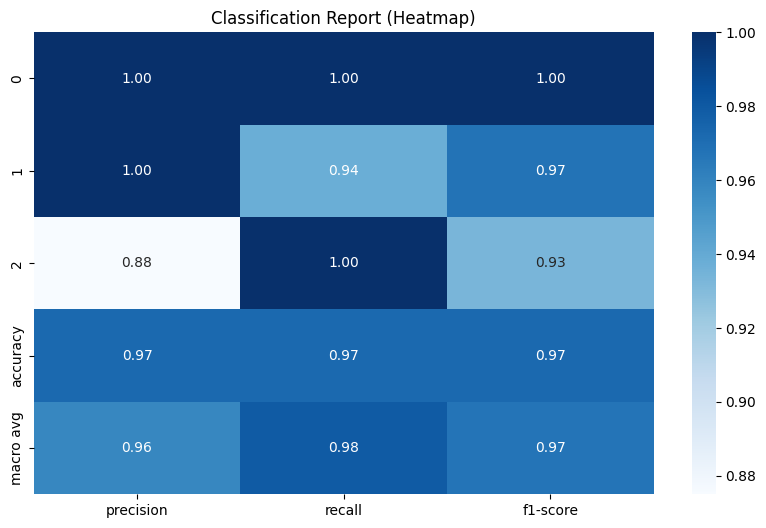

In [264]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report (Heatmap)")
plt.show()

In [265]:
print(report_df.round(2))

              precision  recall  f1-score  support
0                  1.00    1.00      1.00    13.00
1                  1.00    0.94      0.97    16.00
2                  0.88    1.00      0.93     7.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.96    0.98      0.97    36.00
weighted avg       0.98    0.97      0.97    36.00


- precision
- recall 
- f1-score 
- support

yorumluyorum

Sınıf 0
- Precision: 1.00 → Modelin sınıf 0 tahminlerinin %100’ü doğru.
- Recall: 1.00 → Gerçek sınıf 0’ların tamamı doğru tahmin edilmiş.
- F1-score: 1.00 → Mükemmel sonuç, model bu sınıfı çok iyi öğrenmiş.
- Support: 13 → Test verisinde 13 adet sınıf 0 var.

In [245]:
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  7]]


Text(0.5, 1.0, 'Confusion Matrix')

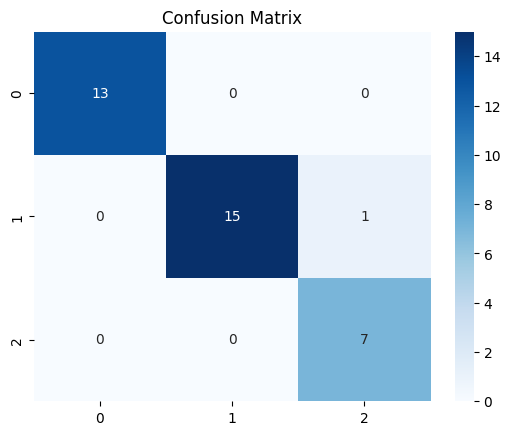

In [261]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")

* satırlar gerçek sınıfları, sütunlar ise tahminleri temsil ediyor

mesela; 
* sınıf0 için 13 örneğim vardı 13'ü de sınıf0 olarak tahmin edildi
* sınıf1 için 16 örneğim vardı 15'i de sınıf1 1 tanesi de sınıf2 olarak tahmin edildi
* sınıf2 için 7 örneğim vardı 7'si de sınıf2 olarak tahmin edildi

In [246]:
coefficients= model_lr.coef_[0]

- Modelin katsayılarını inceleyerek logistic regression’ın kararlarını nasıl verdiğini anlamaya çalışıcam.

In [250]:
features= wine.feature_names
coef_df= pd.DataFrame({"feature": features , "coefficients": coefficients})
coef_df= coef_df.sort_values(by="coefficients", ascending=False)
coef_df

,feature,coefficients
12,proline,1.009368
0,alcohol,0.766781
11,od280/od315_of_diluted_wines,0.666570
6,flavanoids,0.583139
2,ash,0.435310
5,total_phenols,0.248625
1,malic_acid,0.128308
8,proanthocyanins,0.079645
4,magnesium,0.073104
10,hue,0.060134


- Hangi özellikler pozitif etkide bulunmuş
- Hangi özellikler negatif yönde etkili olmuş
- En çok etkisi olanlar en üstte olacak

In [251]:
coef_df.head(3)

,feature,coefficients
12,proline,1.009368
0,alcohol,0.766781
11,od280/od315_of_diluted_wines,0.666570


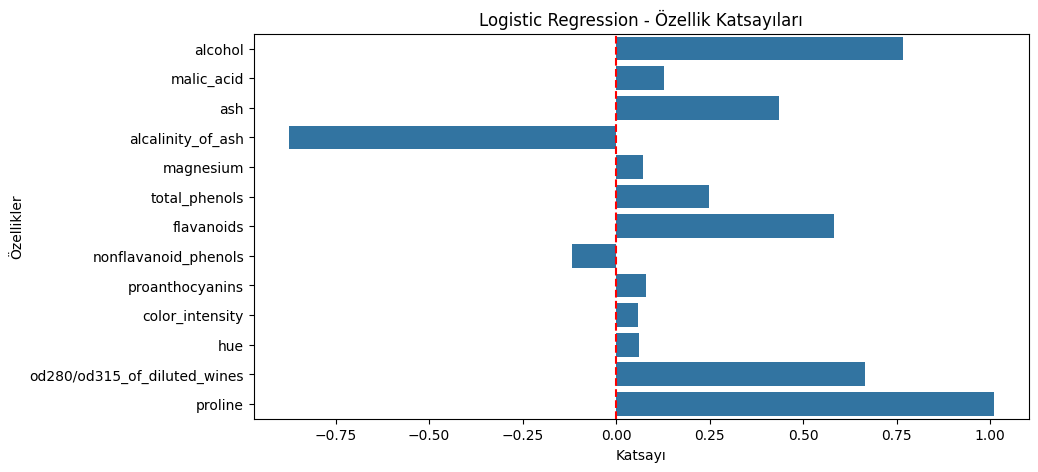

In [258]:
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients, y=features)
plt.title("Logistic Regression - Özellik Katsayıları")
plt.xlabel('Katsayı')
plt.ylabel('Özellikler')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier(random_state=432)

In [267]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [272]:
print("Decision Tree Derinliği:", model_dt.get_depth())
print("Decision Tree Yaprak Sayısı:", model_dt.get_n_leaves())

Decision Tree Derinliği: 5
Decision Tree Yaprak Sayısı: 10


In [268]:
y_pred_dt= model_dt.predict(x_test)

In [269]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_dt= classification_report(y_test, y_pred_dt)
confusion_dt= confusion_matrix(y_test, y_pred_dt)

In [276]:
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9166666666666666


In [277]:
print("Classification Report:\n", classification_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.94      0.91        16
           2       1.00      0.86      0.92         7

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [279]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

class_metrics = report_df.iloc[:3, :3] 

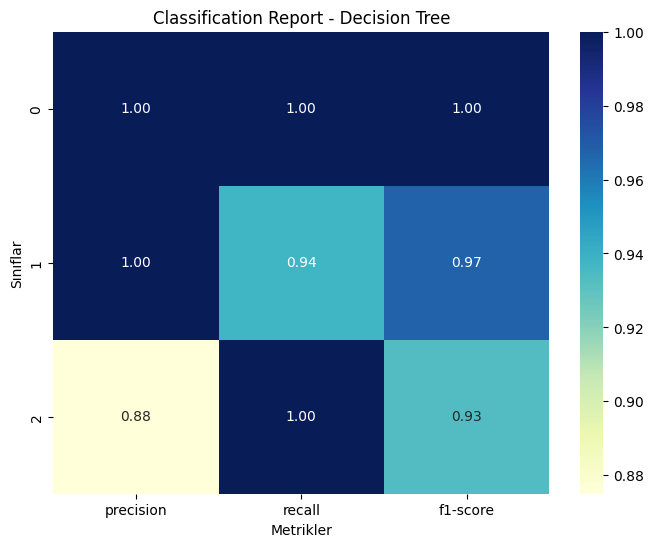

In [280]:
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report - Decision Tree")
plt.ylabel("Sınıflar")
plt.xlabel("Metrikler")
plt.show()

In [283]:
print("Confusion Matrix:\n", confusion_dt)

Confusion Matrix:
 [[12  1  0]
 [ 1 15  0]
 [ 0  1  6]]


In [281]:
cm_dt = confusion_matrix(y_test, y_pred)
labels = [0, 1, 2]


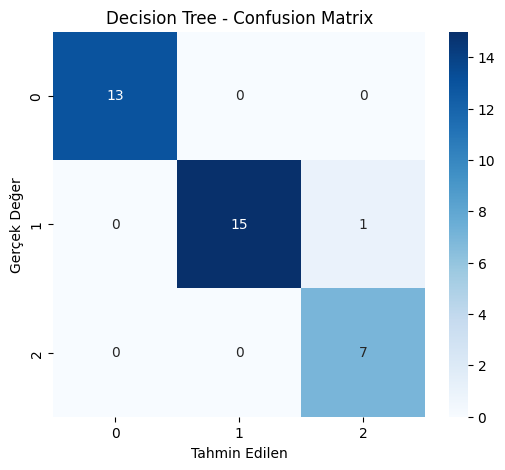

In [282]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

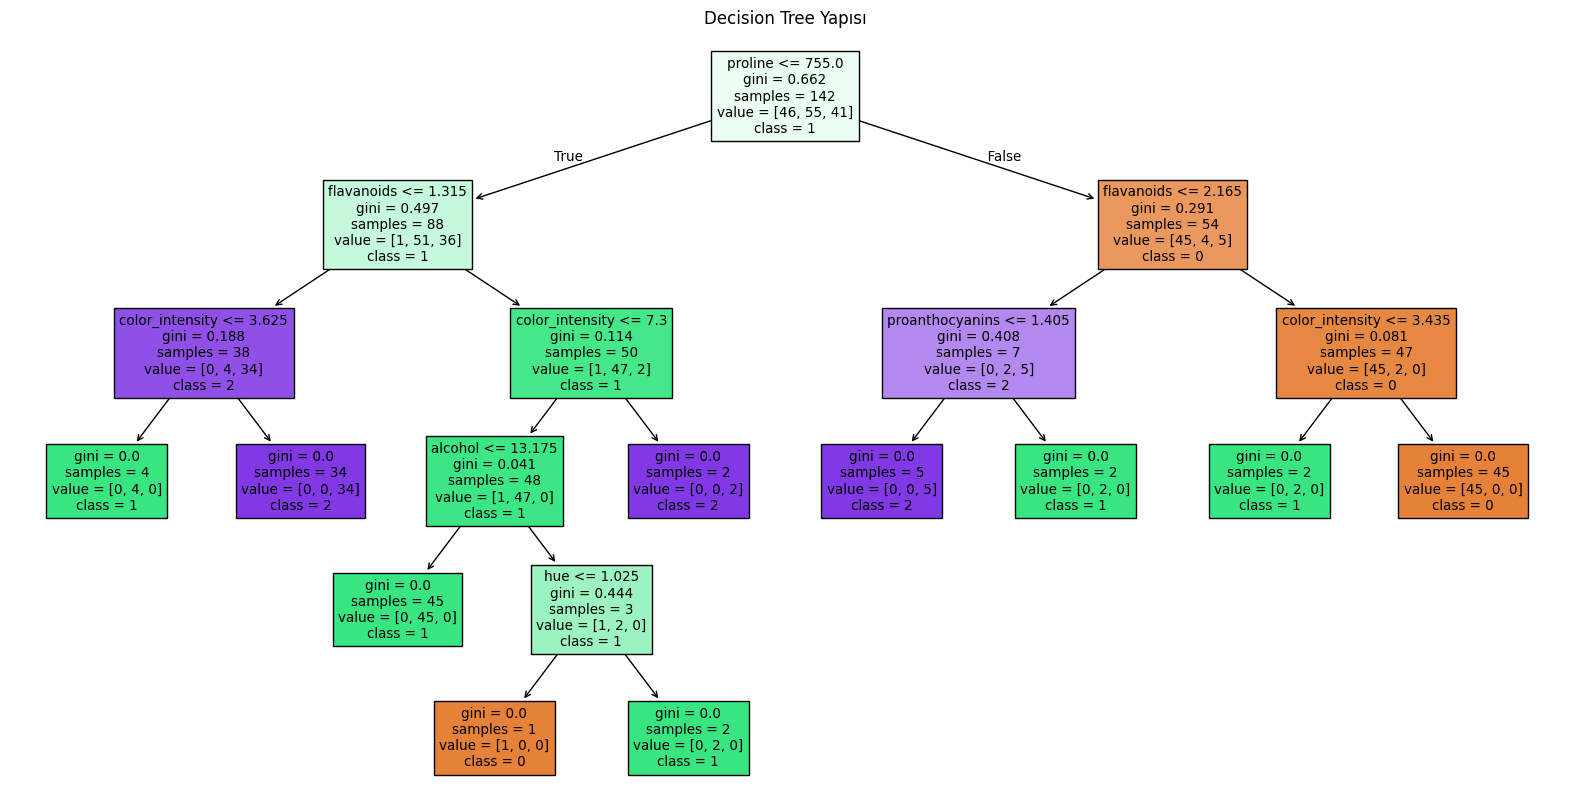

In [275]:
plt.figure(figsize=(20,10))
plot_tree(model_dt, filled=True, feature_names=features, class_names=["0", "1", "2"])
plt.title("Decision Tree Yapısı")
plt.show()

## Karşılaştırma